# Ridge Regression

Ridge Regression is a **regularized version** of Linear Regression that helps prevent **overfitting**.

It adds a **penalty term** (called L2 regularization) to the cost function, which discourages the model 
from giving too much importance (large coefficients) to any single feature.


## 🎯 Intuition

In Linear Regression, we try to minimize the **Sum of Squared Errors (SSE):**

J=∑(yi​−yi​^​)2

But if the model has many features or if features are correlated, 
the coefficients can become very large — leading to **overfitting** (good performance on training data, poor on test data).

To avoid that, **Ridge Regression** modifies the cost function:

J=∑(yi​−yi​^​)2+λ∑βj2​

Here:
- 𝜆  = Regularization parameter (controls the strength of penalty)
- 𝛽𝑗 = Squares of the coefficients
- Larger 𝜆 → smaller coefficients → simpler model

✅ So Ridge Regression keeps model weights **small** and prevents overfitting.


In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge

In [2]:
# Generate some data (with noise)
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) * 2

# Adding extra correlated features to exaggerate overfitting
X_poly = np.c_[X, X**2, X**3]

In [3]:
# Linear Regression (No Regularization)
linear_reg = LinearRegression()
linear_reg.fit(X_poly, y)
y_pred_linear = linear_reg.predict(X_poly)

In [4]:
# Ridge Regression (With Regularization)
ridge_reg = Ridge(alpha=10)   # alpha = λ
ridge_reg.fit(X_poly, y)
y_pred_ridge = ridge_reg.predict(X_poly)

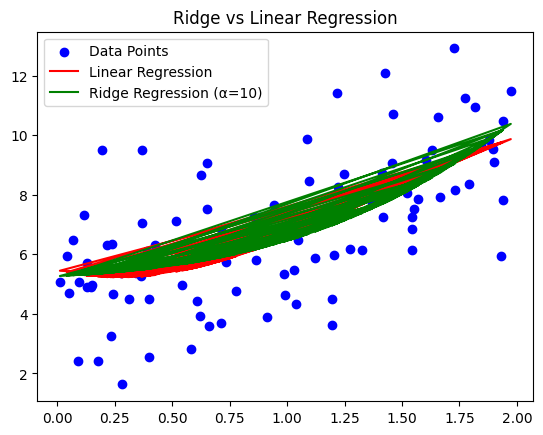

In [5]:
# 📊 Visualizing Ridge vs Linear Regression
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_linear, color='red', label='Linear Regression')
plt.plot(X, y_pred_ridge, color='green', label='Ridge Regression (α=10)')
plt.title("Ridge vs Linear Regression")
plt.legend()
plt.show()

## 🧠 Intuition Recap

| Term | Meaning |
|------|----------|
| **Regularization** | Technique to penalize large coefficients |
| **α (lambda)** | Regularization strength — higher means more penalty |
| **Effect** | Shrinks coefficients → reduces model complexity |
| **Goal** | Better generalization and avoid overfitting |

---

### 🧩 Comparing Coefficients

Let’s see how Ridge Regression actually reduces coefficient magnitudes.


In [6]:
print("Linear Regression Coefficients:", linear_reg.coef_)
print("Ridge Regression Coefficients:", ridge_reg.coef_)

Linear Regression Coefficients: [[-1.87414005  3.89357817 -0.9196011 ]]
Ridge Regression Coefficients: [0.37740578 0.49677579 0.31604199]


You’ll see that Ridge Regression produces **smaller coefficients**, 
meaning it penalized the model for fitting too tightly to the data.

---

## ⚙️ When to Use Ridge Regression

✅ Use when:
- You have **many correlated features** (multicollinearity)
- You want to **prevent overfitting**
- You prefer **smooth coefficients** (not sparse)

⚠️ Don’t use when:
- You expect some features to be irrelevant — use **Lasso Regression** instead (which can zero them out)


## 🧮 Formula Summary

| Model | Cost Function |
|--------|----------------|
| Linear Regression | J=∑(yi​−yi​^​)2 |
| Ridge Regression | J=∑(yi​−yi​^​)2+λ∑βj2 |


## 🧠 In Simple Words

Ridge Regression = Linear Regression + Penalty on Large Coefficients  
It trades a **tiny bit of bias** for **a big reduction in variance**, 
which leads to better predictions on unseen data.


## Relation Between λ (Lambda) and Slope² (Coefficient Squared)

### 🔍 Effect Summary

| λ (Lambda) | Regularization Strength | Effect on Coefficients (Slope²) | Model Behavior |
|-------------|--------------------------|----------------------------------|----------------|
| 0 | No regularization | Slopes can be large | Overfits the data |
| Small | Mild penalty | Slopes slightly reduced | Good fit, less variance |
| Large | Strong penalty | Slopes become very small | Underfits, high bias |
| ∞ | Maximum penalty | Slopes → 0 | Flat line (mean prediction) |


## 🧩 Visualization Idea

If you plot λ on the x-axis and the coefficient magnitudes (|θ|) on the y-axis,
you’ll get a **monotonically decreasing curve** — as λ increases, coefficients shrink toward zero.

This is often called a **regularization path**.


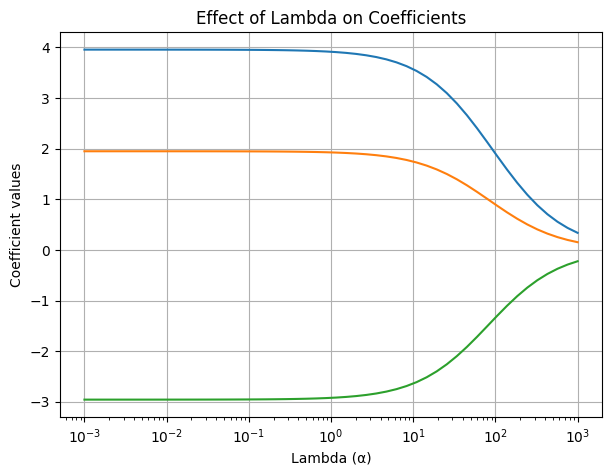

In [8]:
# Example: Visualizing the relationship between lambda and coefficients
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Generate simple data
np.random.seed(0)
X = np.random.randn(100, 3)
y = 4*X[:, 0] + 2*X[:, 1] - 3*X[:, 2] + np.random.randn(100)

lambdas = np.logspace(-3, 3, 50)
coefs = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(7,5))
plt.plot(lambdas, coefs)
plt.xscale('log')
plt.xlabel("Lambda (α)")
plt.ylabel("Coefficient values")
plt.title("Effect of Lambda on Coefficients")
plt.grid(True)
plt.show()


## 🧠 In Simple Words

- **λ** is like a "slope shrinker".
- The **larger λ gets**, the **smaller the slope² (θ²)** becomes.
- This reduces model complexity and helps prevent overfitting.

In essence:
Increase in λ → Decrease in slope magnitude (θ²)
